In [2]:
import pandas as pd
import numpy as np
from itertools import product
from ast import literal_eval
import seaborn as sns
import random
import matplotlib.pyplot as plt
import copy
from tqdm import tqdm

In [3]:
cntry_cntry_df = pd.read_csv("..//..//..//data//Data//DerivedData//Derived//funding_source_target.csv")
cntry_cntry_df.head()

,source,target,value
0,Afghanistan,Afghanistan,0.500000
1,Afghanistan,Australia,0.333333
2,Afghanistan,Bangladesh,0.666667
3,Afghanistan,Bolivia,0.125000
4,Afghanistan,Canada,1.132576


In [4]:
cntry_cntry_df = cntry_cntry_df.pivot_table(
    index='source',columns='target', values='value', fill_value=0)
cntry_cntry_df.head()

target,Afghanistan,Albania,Algeria,Andorra,Angola,Antarctica,Antigua & Barbuda,Argentina,Armenia,Australia,...,United States,Uruguay,Uzbekistan,Vanuatu,Vatican,Venezuela,Vietnam,Yemen,Zambia,Zimbabwe
source,,,,,,,,,,,,,,,,,,,,,
Afghanistan,0.5,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.00000,0.0,0.333333,...,2.299242,0.0,0.0,0.0,0.0,0.0,0.50,0.000000,0.0,0.0
Albania,0.0,8.833333,0.000000,0.0,0.000000,0.0,0.0,0.00000,0.0,0.277778,...,1.000000,0.0,0.0,0.0,0.0,0.0,1.00,0.000000,0.0,0.0
Algeria,0.0,0.000000,1706.342726,0.0,0.000000,0.0,0.0,3.92619,0.0,1.997885,...,21.937491,0.0,0.0,0.0,0.0,0.0,0.25,0.333333,0.0,0.0
Andorra,0.0,0.000000,0.000000,3.5,0.000000,0.0,0.0,0.00000,0.0,0.000000,...,3.900000,0.0,0.0,0.0,0.0,0.0,0.00,0.000000,0.0,0.0
Angola,0.0,0.000000,0.000000,0.0,20.581349,0.0,0.0,0.00000,0.0,2.650000,...,3.602381,0.0,0.0,0.0,0.0,0.0,0.00,0.000000,0.0,0.0


In [5]:
cntry_out = cntry_cntry_df.sum(axis=1).reset_index(name="unitsout")
cntry_in = cntry_cntry_df.sum(axis=0).reset_index(name='unitsin')
cntry_in_out=cntry_in.merge(
    cntry_out, left_on="target",right_on="source",how="inner")
cntry_in_out.head()

,target,unitsin,source,unitsout
0,Afghanistan,95.035440,Afghanistan,23.0
1,Albania,207.108642,Albania,34.0
2,Algeria,4864.172289,Algeria,2607.0
3,Andorra,25.181734,Andorra,53.0
4,Angola,204.422412,Angola,76.0


In [9]:
cntry_in_out.sort_values(by='unitsout')

,target,unitsin,source,unitsout
157,South Sudan,2.025556e+01,South Sudan,1.000000e+00
184,Vatican,1.444274e+02,Vatican,3.000000e+00
168,Tajikistan,1.915572e+02,Tajikistan,3.000000e+00
154,Somalia,1.859910e+01,Somalia,3.000000e+00
104,Maldives,3.791457e+01,Maldives,3.000000e+00
...,...,...,...,...
62,Germany,8.629972e+05,Germany,7.456020e+05
179,United Kingdom,9.116550e+05,United Kingdom,7.931600e+05
84,Japan,8.571260e+05,Japan,8.459150e+05
180,United States,4.794112e+06,United States,4.962957e+06


In [5]:
pubs_author_funder = pd.read_csv("..//..//..//data//Data//DerivedData//CleanedRawData//pubs_author_funder.csv")
pubs_author_funder['author_country'] = pubs_author_funder['author_country'].apply(literal_eval)
pubs_author_funder['funder_country'] = pubs_author_funder['funder_country'].apply(literal_eval)
pubs_author_funder['funding_units'] = pubs_author_funder['funder_country'].apply(lambda x: len(x))

## calculate the transition matrix based on "labor flow" paper

In [36]:
indexlist = cntry_cntry_df.index
collist = cntry_cntry_df.columns
expect_df = pd.DataFrame(
    index=indexlist,columns=collist)
for ind, col in product(indexlist, collist):
    sout=cntry_out[cntry_out.source==ind]['unitsout'].values[0]
    sin=cntry_in[cntry_in.target==col]['unitsin'].values[0]
    exp=(sout*sin)/unitstotal
    expect_df.loc[ind,col]=exp

In [39]:
trans_df = pd.DataFrame(
    index=indexlist,columns=collist)
for ind, col in product(indexlist, collist):
    actual_value=cntry_cntry_df.loc[ind,col]
    exp_value=expect_df.loc[ind,col]
    trans_value=actual_value/exp_value
    trans_df.loc[ind,col]=trans_value
trans_df.head()

target,Afghanistan,Albania,Algeria,Andorra,Angola,Antarctica,Antigua & Barbuda,Argentina,Armenia,Australia,...,United States,Uruguay,Uzbekistan,Vanuatu,Vatican,Venezuela,Vietnam,Yemen,Zambia,Zimbabwe
source,,,,,,,,,,,,,,,,,,,,,
Afghanistan,6029.62,0,0,0,0,0,0,0,0,0.755875,...,0.543985,0,0,0,0,0,38.3643,0,0,0
Albania,0,30725.7,0,0,0,0,0,0,0,0.426106,...,0.160048,0,0,0,0,0,51.9047,0,0,0
Algeria,0,0,3286.55,0,0,0,0,0.326512,0,0.0397408,...,0.0455286,0,0,0,0,0,0.168265,6.0392,0,0
Andorra,0,0,0,61598.1,0,0,0,0,0,0,...,0.400423,0,0,0,0,0,0,0,0,0
Angola,0,0,0,0,31445.7,0,0,0,0,1.81858,...,0.257932,0,0,0,0,0,0,0,0,0


## reshuffle the authorship unit and the fundingship unit 

In [6]:
pubs_author_funder.head()

,id,author_country,funder_country,funding_units
0,30507292,[Turkey],[Turkey],1
1,30574690,"[United States, France]","[United States, United States, United States, ...",4
2,30574691,[Russia],[Russia],1
3,30585095,"[Spain, Spain]","[Spain, Spain, Spain, Spain, Spain, Spain]",6
4,30585097,"[Germany, Spain]",[Spain],1


In [6]:
pubs_author=pubs_author_funder[['id','author_country']].explode('author_country')

In [7]:
pubs_author=pubs_author.groupby(
    ['id','author_country']).size().reset_index(name="count")
pubs_author.head()

,id,author_country,count
0,30507292,Turkey,1
1,30574690,France,1
2,30574690,United States,1
3,30574691,Russia,1
4,30585095,Spain,2


In [27]:
pubs_author_reshuffle=reshuffle_count(pubs_author, 'author_country')
pubs_author_reshuffle.head()

<ipython-input-9-5b7cd0709d05>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cntry_df['random']=unitlist


,id,author_country,count,random
0,30507292,Turkey,1,2
1,30590517,Turkey,2,3
2,30730821,Turkey,2,1
3,30730942,Turkey,2,2
4,30746044,Turkey,2,1


In [97]:
pubs_author_null=expand_unit_to_list(pubs_author_reshuffle, 'author_country')
pubs_author_null.head()

,id,author_country
0,30507292,"[Turkey, Turkey]"
1,30574690,"[France, United States]"
2,30574691,[Russia]
3,30585095,"[Spain, Spain]"
4,30585097,"[Spain, Spain, Spain, Germany, Germany]"


In [99]:
pubs_author_null.to_csv("pubs_author_shuffled.csv", index=False)

In [15]:
def convert_tolist(cntry,count):
    cntrylist=[cntry for n in range(count)]
    return cntrylist

In [96]:
def expand_unit_to_list(data, colname):
    #data['countrylist']=data.apply(lambda x: convert_tolist(x[colname],x['random']), axis=1)
    #null_df = data.groupby('id')['countrylist'].progress_apply(sum)
    null_df = data.groupby('id')['countrylist'].sum()
    null_df = null_df.reset_index()
    null_df.columns=['id',colname]
    return null_df

In [9]:
def reshuffle_count(data, colname):
    null_df=pd.DataFrame()
    cntrylist=data[colname].unique().tolist()
    
    for cntry in cntrylist:
        cntry_df=data[data.author_country==cntry]
        unitlist=cntry_df['count'].tolist()
        for _ in range(2):
            random.shuffle(unitlist)
        cntry_df['random']=unitlist
        null_df=pd.concat([null_df, cntry_df], ignore_index=True)
        
    return null_df
        


## random distribute the funding unit along the funding relationship from country to paper


In [6]:
pubs_author_funder.head()

,id,author_country,funder_country,funding_units
0,30507292,[Turkey],[Turkey],1
1,30574690,"[United States, France]","[United States, United States, United States, ...",4
2,30574691,[Russia],[Russia],1
3,30585095,"[Spain, Spain]","[Spain, Spain, Spain, Spain, Spain, Spain]",6
4,30585097,"[Germany, Spain]",[Spain],1


In [7]:
pubs_funder=pubs_author_funder[['id','funder_country']].explode("funder_country")
pubs_funder = pubs_funder.groupby(['id','funder_country']).size().reset_index(name="count")

In [8]:
pubs_funder.head()

,id,funder_country,count
0,30507292,Turkey,1
1,30574690,United States,4
2,30574691,Russia,1
3,30585095,Spain,6
4,30585097,Spain,1


In [9]:
funderlist=pubs_funder.funder_country.unique()
pubs_funder_null=pd.DataFrame()
for funder in funderlist:
    cntry_df=pubs_funder[pubs_funder.funder_country==funder]
    unitlist=cntry_df['count'].tolist()
    for _ in range(2):
        random.shuffle(unitlist)
    cntry_df['units_shuffle']=unitlist
    pubs_funder_null=pd.concat([pubs_funder_null,cntry_df],ignore_index=True)


<ipython-input-9-4bdc6632797d>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cntry_df['units_shuffle']=unitlist


In [10]:
pubs_funder_null.head()

,id,funder_country,count,units_shuffle
0,30507292,Turkey,1,1
1,30590517,Turkey,1,2
2,30730821,Turkey,1,1
3,30730942,Turkey,1,1
4,30746044,Turkey,1,2


In [11]:
unitnull_df = pubs_funder_null.groupby('id')['units_shuffle'].sum().reset_index()
unitnull_df.head()

,id,units_shuffle
0,30507292,1
1,30574690,2
2,30574691,2
3,30585095,1
4,30585097,3


In [15]:
pubs_author_funder_null=pubs_author_funder.merge(unitnull_df, on="id")
pubs_author_funder_null.head()

,id,author_country,funder_country,funding_units,units_shuffle
0,30507292,[Turkey],[Turkey],1,1
1,30574690,"[United States, France]","[United States, United States, United States, ...",4,2
2,30574691,[Russia],[Russia],1,2
3,30585095,"[Spain, Spain]","[Spain, Spain, Spain, Spain, Spain, Spain]",6,1
4,30585097,"[Germany, Spain]",[Spain],1,3


In [12]:
def generate_null(data, col_unit):
    cntry_cntry_explodelist = []
    for index, row in data.iterrows():
        units = row[col_unit]
        author_country = row['author_country']
        funding_country=row['funder_country']
        num_author = len(author_country)
        num_funder=len(funding_country)
        for author_c in author_country:
            for funder_c in funding_country:
                credit = units/(num_author*num_funder)
                templist = [funder_c,author_c, credit]
                cntry_cntry_explodelist.append(templist)
                
    cntry_cntry_null = pd.DataFrame(
        cntry_cntry_explodelist, columns=['source','target','value'])
    cntry_cntry_null = cntry_cntry_null.groupby(['source','target'])['value'].sum().reset_index()
    cntry_cntry_null = cntry_cntry_null.pivot_table(
        index='source',columns='target', values='value', fill_value=0)
    return cntry_cntry_null
    

In [13]:
def get_normedmatrix(indexlist, collist, actual_df, random_df):
    
    randomnormed_df = pd.DataFrame(
        index=indexlist,columns=collist)
    for ind, col in product(indexlist, collist):
        try:
            actual_value=actual_df.loc[ind,col]
        except:
            actual_value=0
        random_value=random_df.loc[ind,col]
        exp=actual_value/random_value
        randomnormed_df.loc[ind,col]=exp
    randomnormed_df = randomnormed_df.fillna(0)
    
    return randomnormed_df


In [16]:
units_shuffle_df=generate_null(pubs_author_funder_null, 'units_shuffle')

In [17]:
funderlist=cntry_cntry_df.index
authorlist=cntry_cntry_df.columns
normed_unitshuffle_df = get_normedmatrix(funderlist, authorlist, cntry_cntry_df, units_shuffle_df)

<ipython-input-13-13d4e271a30e>:11: RuntimeWarning: invalid value encountered in double_scalars
  exp=actual_value/random_value


In [18]:
top20 = cntry_in_out.sort_values(
    by='unitsout',ascending=False).head(20).source

In [19]:
import matplotlib.colors as colors
divnorm = colors.DivergingNorm(vmin=0.7, vcenter=1, vmax=1.2)

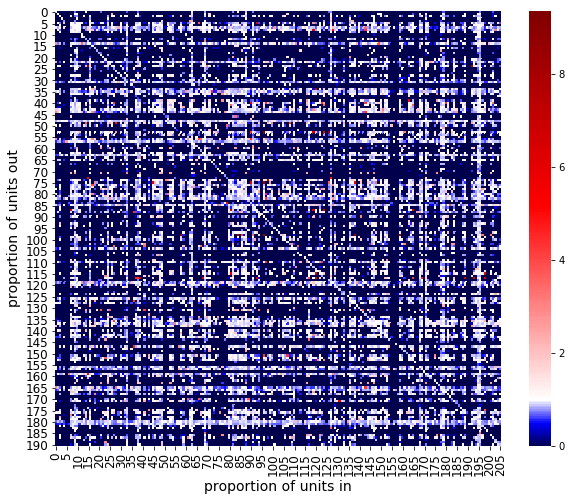

In [20]:
fig, ax = plt.subplots(figsize=(10,8))
sns.heatmap(normed_unitshuffle_df.values,norm=divnorm,cmap="seismic")
plt.ylabel("proportion of units out", fontsize=14)
plt.xlabel("proportion of units in", fontsize=14)
plt.tick_params(axis='both',labelsize=12)

In [37]:
normed_unitshuffle_df.loc["United States",normed_unitshuffle_df.loc['United States',:]>1]

target
Bahamas                            1.105172
Barbados                           1.077486
Chad                               1.441804
Chile                              1.025443
Eritrea                            1.056323
Estonia                            1.094355
Federated States of Micronesia     1.041180
Finland                            1.061985
French-Polynesia                   1.121373
Grenada                            1.086147
Guinea-Bissau                      1.020832
Guyana                             1.022532
Haiti                              1.009266
Iceland                            1.206485
Macedonia                          1.236147
Madagascar                         1.320400
Malawi                             1.109587
Nicaragua                          1.019348
Republic of Kosovo                 1.032816
Rwanda                             1.042843
South Sudan                        1.081619
St-Lucia                           1.557287
Tonga                    

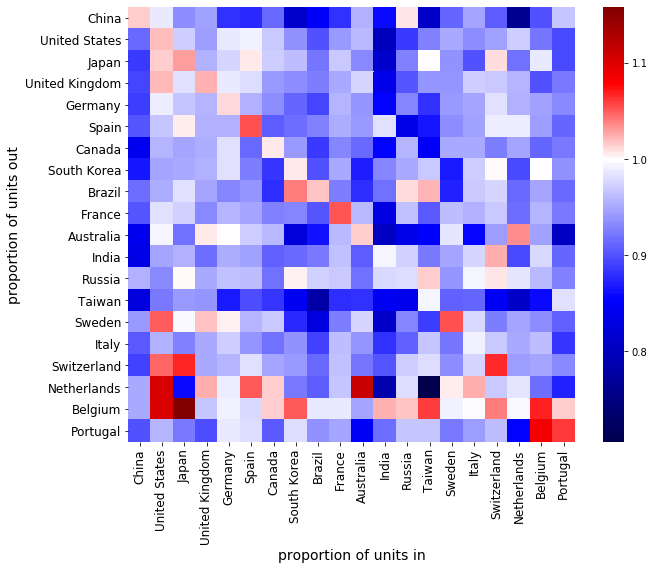

In [21]:
fig, ax = plt.subplots(figsize=(10,8))
sns.heatmap(normed_unitshuffle_df.loc[top20,top20],norm=divnorm,cmap="seismic")
plt.ylabel("proportion of units out", fontsize=14)
plt.xlabel("proportion of units in", fontsize=14)
plt.tick_params(axis='both',labelsize=12)

In [22]:
pubs_author_funder.head()

,id,author_country,funder_country,funding_units
0,30507292,[Turkey],[Turkey],1
1,30574690,"[United States, France]","[United States, United States, United States, ...",4
2,30574691,[Russia],[Russia],1
3,30585095,"[Spain, Spain]","[Spain, Spain, Spain, Spain, Spain, Spain]",6
4,30585097,"[Germany, Spain]",[Spain],1


In [23]:
pubs_ath_fder_quota=pubs_author_funder[['id','author_country']]
pubs_ath_fder_quota['funder_country']=pubs_author_funder['author_country']
pubs_ath_fder_quota.head()

<ipython-input-23-9cb93f8c4760>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pubs_ath_fder_quota['funder_country']=pubs_author_funder['author_country']


,id,author_country,funder_country
0,30507292,[Turkey],[Turkey]
1,30574690,"[United States, France]","[United States, France]"
2,30574691,[Russia],[Russia]
3,30585095,"[Spain, Spain]","[Spain, Spain]"
4,30585097,"[Germany, Spain]","[Germany, Spain]"


In [24]:
pubs_ath_fder_quota['units_basedauthor'] = pubs_ath_fder_quota['funder_country'].apply(lambda x: len(x))
pubs_ath_fder_quota.head()

,id,author_country,funder_country,units_basedauthor
0,30507292,[Turkey],[Turkey],1
1,30574690,"[United States, France]","[United States, France]",2
2,30574691,[Russia],[Russia],1
3,30585095,"[Spain, Spain]","[Spain, Spain]",2
4,30585097,"[Germany, Spain]","[Germany, Spain]",2


In [25]:
units_basedauthor_df=generate_null(pubs_ath_fder_quota, 'units_basedauthor')

In [26]:
authorlist=cntry_cntry_df.columns
normed_unitsauthor_df = get_normedmatrix(authorlist, authorlist, cntry_cntry_df, units_basedauthor_df)

<ipython-input-13-13d4e271a30e>:11: RuntimeWarning: invalid value encountered in double_scalars
  exp=actual_value/random_value
<ipython-input-13-13d4e271a30e>:11: RuntimeWarning: divide by zero encountered in double_scalars
  exp=actual_value/random_value


In [52]:
normed_unitsauthor_df.values.max()

inf

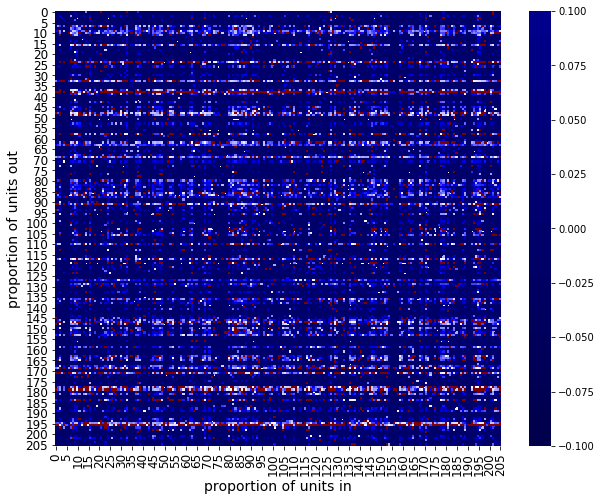

In [27]:
divnorm = colors.DivergingNorm(vmin=0, vcenter=1, vmax=40)
fig, ax = plt.subplots(figsize=(10,8))
sns.heatmap(normed_unitsauthor_df.values,norm=divnorm,cmap="seismic")
plt.ylabel("proportion of units out", fontsize=14)
plt.xlabel("proportion of units in", fontsize=14)
plt.tick_params(axis='both',labelsize=12)

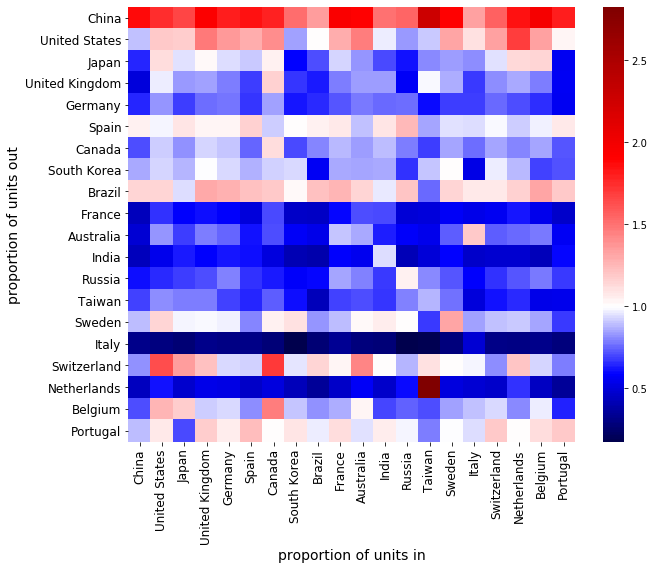

In [28]:
divnorm = colors.DivergingNorm(vmin=0, vcenter=1, vmax=40)
fig, ax = plt.subplots(figsize=(10,8))
sns.heatmap(normed_unitsauthor_df.loc[top20,top20],norm=divnorm,cmap="seismic")
plt.ylabel("proportion of units out", fontsize=14)
plt.xlabel("proportion of units in", fontsize=14)
plt.tick_params(axis='both',labelsize=12)

In [51]:
randomnormed_df.loc[top20,top20]

target,China,United States,Germany,Spain,Japan,United Kingdom,Brazil,Canada,South Korea,France,Australia,India,Russia,Taiwan,Sweden,Italy,Switzerland,Netherlands,Portugal,Belgium
source,,,,,,,,,,,,,,,,,,,,
China,3.318417,3.082463,3.161063,3.170528,2.958779,3.397148,2.052780,3.162135,2.428872,3.370926,3.353253,2.374362,2.586927,3.215519,3.365076,2.173142,2.665171,3.127369,2.973693,3.369211
United States,0.900513,1.193165,1.361075,1.291777,1.177956,1.485766,1.000683,1.403069,0.848656,1.296278,1.469438,0.973288,0.834752,0.906043,1.321690,1.108015,1.328990,1.688946,1.035287,1.331573
Germany,0.797687,1.038956,1.064806,0.823230,0.866360,0.949602,0.805733,1.039686,0.757369,0.909507,0.988302,0.928280,1.001844,0.742568,0.867030,0.821629,0.975517,0.892597,0.681271,0.816488
Spain,4.844148,1.225219,1.226795,1.415746,1.380432,1.238084,1.298280,1.105035,2.139242,1.277736,1.100412,1.394791,1.391202,36.107984,1.129109,1.108957,1.167214,1.097363,1.307718,1.159414
Japan,0.659046,1.129932,0.951019,0.919391,0.966593,1.021508,0.717385,1.056497,0.599922,0.938846,0.833254,0.713483,0.622317,0.812345,0.847114,0.817666,0.958810,1.139484,0.564422,1.158074
United Kingdom,0.511050,1.004239,0.794899,0.685832,0.835759,0.847057,0.631308,1.164264,0.676159,0.792921,0.845302,0.844413,0.573872,0.988904,0.868754,0.681605,0.814635,0.860051,0.566636,0.790600
Brazil,1.325964,1.485177,1.609698,1.504516,1.219451,1.636322,1.668945,1.554182,1.261369,1.545861,1.492558,1.178792,1.393492,0.892802,1.442948,1.329791,1.385974,1.511828,1.496794,1.641855
Canada,0.764409,0.983893,0.957818,0.792513,0.865350,0.967625,0.848422,1.186852,0.753119,0.951371,0.874531,0.940802,0.837844,0.705888,0.887909,0.814551,0.907160,0.833503,0.758639,0.902018
South Korea,0.880793,0.945789,0.947348,0.881216,0.912159,1.009327,0.571640,0.942752,0.954508,0.870015,0.867052,0.876218,0.675342,1.258771,1.033336,0.540515,0.975508,0.904099,0.726851,0.703515
